1.	Import the libraries
2.	Import the dataset
3.	Retrieve only required data from the dataset
4.	Compute proximity matrix
5.	Plot the dendrogram
6.	Find number of clusters by how many is the line cutting through the dendrogram
7.	Plot the final clusters

In [1]:
#Import required libraries
import pandas as pd                       
import numpy as np                       
import matplotlib.pyplot as plt
from scipy.spatial import distance_matrix
import scipy.cluster.hierarchy as shc

In [2]:
#Read the dataset
data = pd.read_csv('19BCE2072_studentmarks.csv')                       
data

,student_id,marks,y
0,1,10,0
1,2,7,0
2,3,28,0
3,4,20,0
4,5,35,0


In [3]:
#Retrieve only required data from the dataset
x= np.array(data.iloc[:, 1:3])
x

array([[10,  0],
       [ 7,  0],
       [28,  0],
       [20,  0],
       [35,  0]])

In [4]:
#Compute proximity matrix
proximityMatrix = distance_matrix(x, x, p=2)
proximityMatrix

array([[ 0.,  3., 18., 10., 25.],
       [ 3.,  0., 21., 13., 28.],
       [18., 21.,  0.,  8.,  7.],
       [10., 13.,  8.,  0., 15.],
       [25., 28.,  7., 15.,  0.]])

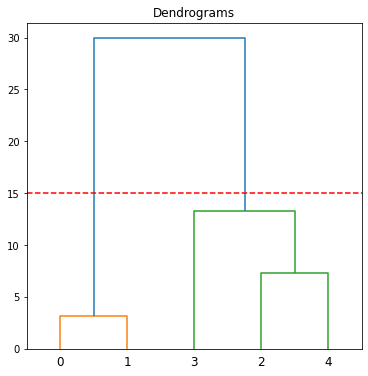

In [5]:
#Plot the dendrogram
plt.figure(figsize=(6, 6))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data, method='ward'))
plt.axhline(y=15, color='r', linestyle='--')

In [6]:
#Since the line is cutting the dendrogram at 2 points, number of clusters=2
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='single')  
cluster.fit_predict(data)

array([1, 1, 0, 0, 0])

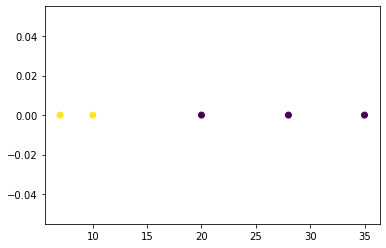

In [7]:
#Plot the final clusters
plt.scatter(data['marks'], data['y'], c=cluster.labels_) 